# Job-shop MIP

In [1]:
import numpy as np
import pyomo.environ as pyo
from jobshop.params import JobShopRandomParams
from jobshop.mip.disjunctive import DisjModel
from jobshop.mip.timeindex import TimeModel

## Disjunctive model

$$
\begin{align}
    \text{min} \quad & C \\
    \text{s.t.}~~ & x_{\sigma_{h-1}^j, j} + p_{\sigma_{h-1}^j, j} \leq x_{\sigma_{h}^j, j}
        & \forall ~ j \in J; h \in (2, ..., |M|)\\
    & x_{m, j} + p_{m, j} \leq mx_{m, k} + V (1 - z_{m, j, k})
        & \forall ~ j, k \in J, j \neq k; m \in M\\
    & z_{m, j, k} + z_{m, k, j} = 1
        & \forall ~ j, k \in J, j \neq k; m \in M\\
    & x_{\sigma_{|M|}^j, j} + p_{\sigma_{|M|}^j, j} \leq C
        & \forall ~ j \in J\\
    & x_{m, j} \geq 0 & \forall ~ j \in J; m \in M\\
    & z_{m, j, k} \in \{0, 1\} & \forall ~ j, k \in J; m \in M\\
\end{align}
$$

In [2]:
params = JobShopRandomParams(5, 4, t_span=(5, 20), seed=12)
disj_model = DisjModel(params)

In [3]:
solver = pyo.SolverFactory(
    "cbc", 
    options=dict(cuts="on", sec=20, heur="on", RINS="both", DINS="both"),
)
print(solver.solve(disj_model, tee=True))

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  5 2022 

command line - C:\Users\Bruno\Documents\Programas\Cbc\bin\cbc.exe -cuts on -sec 20 -heur on -RINS both -DINS both -printingOptions all -import C:\Users\Bruno\AppData\Local\Temp\tmp1ru30rnc.pyomo.lp -stat=1 -solve -solu C:\Users\Bruno\AppData\Local\Temp\tmp1ru30rnc.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 20
Option for Rins changed from on to both
Option for Dins changed from off to both
Option for printingOptions changed from normal to all
Presolve 80 (-81) rows, 51 (-51) columns and 220 (-141) elements
Statistics for presolved model
Original problem has 80 integers (80 of which binary)
Presolved problem has 30 integers (30 of which binary)
==== 50 zero objective 2 different
50 variables have objective of 0
1 variables have objective of 1
==== absolute objective values 2 different
50 variables have objective of 0
1 variables have objective of 1
==== for integers 30 zero objective 1 diff

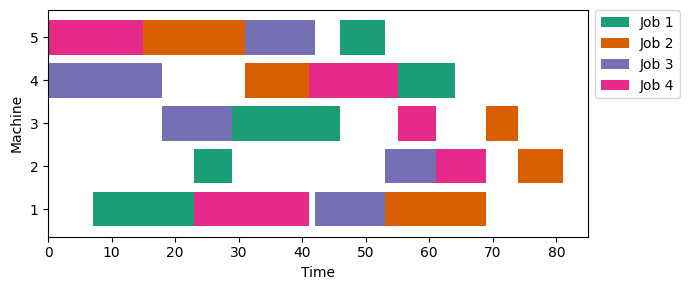

In [4]:
disj_model.plot()

## Time-indexed model

In [5]:
time_model = TimeModel(params)

In [6]:
solver.solve(time_model, tee=True, options=dict(sec=60))

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  5 2022 

command line - C:\Users\Bruno\Documents\Programas\Cbc\bin\cbc.exe -cuts on -sec 60 -heur on -RINS both -DINS both -printingOptions all -import C:\Users\Bruno\AppData\Local\Temp\tmp_hapgkri.pyomo.lp -stat=1 -solve -solu C:\Users\Bruno\AppData\Local\Temp\tmp_hapgkri.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 60
Option for Rins changed from on to both
Option for Dins changed from off to both
Option for printingOptions changed from normal to all
Presolve 1185 (-5) rows, 4581 (-1) columns and 63887 (-917) elements
Statistics for presolved model
Original problem has 4580 integers (4580 of which binary)
Presolved problem has 4580 integers (4580 of which binary)
==== 4580 zero objective 2 different
4580 variables have objective of 0
1 variables have objective of 1
==== absolute objective values 2 different
4580 variables have objective of 0
1 variables have objective of 1
==== for integers 4580 z

{'Problem': [{'Name': 'unknown', 'Lower bound': 66.410147, 'Upper bound': 108.0, 'Number of objectives': 1, 'Number of constraints': 1185, 'Number of variables': 4581, 'Number of binary variables': 4580, 'Number of integer variables': 4580, 'Number of nonzeros': 1, 'Sense': 'minimize'}], 'Solver': [{'Status': 'aborted', 'User time': -1.0, 'System time': 56.85, 'Wallclock time': 56.85, 'Termination condition': 'maxTimeLimit', 'Termination message': 'Optimization terminated because the time expended exceeded the value specified in the seconds parameter.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 970, 'Number of created subproblems': 970}, 'Black box': {'Number of iterations': 30754}}, 'Error rc': 0, 'Time': 56.99559283256531}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

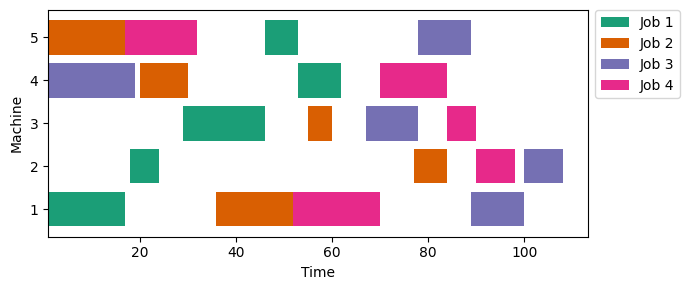

In [7]:
time_model.plot()